# Workflow 1 - extract features from the trajectory

**Input:** reference PDB and trajectory


**Output:** featurized trajectory
<hr>
Steps:

1. Load reference PDB and trajectory in the EnGen object
3. Provide set of featurizations of interest (or use default)
4. Evaluate different featurization (optional)
5. Choose the best featurization
6. Extract those features

In [1]:
# required imports 
from engens.core.EnGens import EnGen
import engens.core.FeatureSelector as fs
import pickle
import mdshare

### Step 1 - load the structure and trajectory

Provide the path to the files with the reference trajectory and topology.
(You can use any format that <a fref = https://mdtraj.org/1.9.4/api/generated/mdtraj.load.html> mdtraj.load </a> will take as input).

Optionally, provide a subset of the structure that you will use for featurization (e.g. binding site) as a <a href=https://mdtraj.org/1.9.4/atom_selection.html> atom selection string </a> or a list of atom indices.


In [2]:
pdb = mdshare.fetch('pentapeptide-impl-solv.pdb', working_directory='.')
files = mdshare.fetch('pentapeptide-00-500ns-impl-solv.xtc', working_directory='.')

In [3]:
# Example 1 - load full trajectory from the files and visualize it

#location of trajectory and topology files
top_loc = "./ExampleProt.pdb"
traj_loc = "./ExampleTraj.xtc"

#instrantiate the engen object
engen1 = EnGen(traj_loc, top_loc)

#visualize the trajectory (optional - if trajectory too large, skip this step)
nglwidget = engen1.show_animated_traj()

nglwidget

NGLWidget(max_frame=2999)

In [4]:
# Example 2 - load a subset of trajectory using a list of atom indices

#location of trajectory and topology files
top_loc = "./ExampleProt.pdb"
traj_loc = "./ExampleTraj.xtc"

#for example - first N atoms?
N = 200
select_list = [i for i in range(N)]

#instrantiate the engen object
engen2 = EnGen(traj_loc, top_loc, select_list)

#visualize the trajectory (optional - if trajectory too large, skip this step)
nglwidget = engen2.show_animated_traj()

nglwidget

NGLWidget(max_frame=2999)

In [5]:
# Example 3 - load a subset of trajectory using the atom selection string

#location of trajectory and topology files
top_loc = "./ExampleProt.pdb"
traj_loc = "./ExampleTraj.xtc"

#start from the known residues of the binding site
binding_site_residues = [6, 56, 60, 63, 64, 78, 81, 82, 85, 86, 89, 94, 150, 164, 165, 166, 171, 174, 178, 179, 182, 183, 243, 246, 247, 249, 250, 253, 261, 262, 263, 264, 267, 268, 271, 274, 275]

#build the selection string
binding_site_selstr = ""
for res_ind in binding_site_residues:
    if binding_site_selstr=="": 
        binding_site_selstr = "resid "+str(res_ind)
    else:
        binding_site_selstr += " or resid "+str(res_ind)

print("Resulting binding site selection string:")
print(binding_site_selstr)

#instrantiate the engen object
engen3 = EnGen(traj_loc, top_loc, binding_site_selstr)

#visualize the trajectory (optional - if trajectory too large, skip this step)
nglwidget = engen3.show_animated_traj()

nglwidget

Resulting binding site selection string:
resid 6 or resid 56 or resid 60 or resid 63 or resid 64 or resid 78 or resid 81 or resid 82 or resid 85 or resid 86 or resid 89 or resid 94 or resid 150 or resid 164 or resid 165 or resid 166 or resid 171 or resid 174 or resid 178 or resid 179 or resid 182 or resid 183 or resid 243 or resid 246 or resid 247 or resid 249 or resid 250 or resid 253 or resid 261 or resid 262 or resid 263 or resid 264 or resid 267 or resid 268 or resid 271 or resid 274 or resid 275


NGLWidget(max_frame=2999)

### Step 2 - select different featurizations

Here we select ways to featurize the trajectory. Any PyEmma <a href = http://www.emma-project.org/latest/api/generated/pyemma.coordinates.featurizer.html> trajectory featurization </a> can be used in this step and any of the parameters of the respective featurizations can be provided. Users can also use the default initialization which includes three sets of features: (1) amino-acid pairwise distances; (2) torsion angles and (3) amino-acid pairwise distances with the torsion angels.

In [6]:
# Example 1 - select the default featurizations

# chose one of the above provided instances of engen class
engen = engen3 # engen1 | engen2 | engen3

# initialize default features 
engen.init_featurizers_default()

# print the desctiption of the default features
description = engen.describe_featurizers()
print(description)

09-12-21 04:50:21 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


09-12-21 04:50:21 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[1] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


Featurizer no. 0:
 ['RES_DIST (closest-heavy) TYR7 - ILE64', 'RES_DIST (closest-heavy) TYR7 - SER65', 'RES_DIST (closest-heavy) TYR7 - ALA79', 'RES_DIST (closest-heavy) TYR7 - VAL82', 'RES_DIST (closest-heavy) TYR7 - LEU83', 'RES_DIST (closest-heavy) TYR7 - THR86', 'RES_DIST (closest-heavy) TYR7 - GLN87', 'RES_DIST (closest-heavy) TYR7 - ILE90', 'RES_DIST (closest-heavy) TYR7 - ALA95', 'RES_DIST (closest-heavy) TYR7 - LYS151']...['RES_DIST (closest-heavy) PRO264 - TYR269', 'RES_DIST (closest-heavy) PRO264 - ILE272', 'RES_DIST (closest-heavy) PRO264 - SER275', 'RES_DIST (closest-heavy) PRO264 - HIS276', 'RES_DIST (closest-heavy) LEU265 - ILE272', 'RES_DIST (closest-heavy) LEU265 - SER275', 'RES_DIST (closest-heavy) LEU265 - HIS276', 'RES_DIST (closest-heavy) MET268 - SER275', 'RES_DIST (closest-heavy) MET268 - HIS276', 'RES_DIST (closest-heavy) TYR269 - HIS276']
 Featurizer no. 1:
 ['COS(PHI 0 ALA 57)', 'SIN(PHI 0 ALA 57)', 'COS(PSI 0 TYR 7)', 'SIN(PSI 0 TYR 7)', 'COS(PHI 0 ALA 61)', 'S

In [7]:
# chose one of the above provided instances of engen class
engen = engen1 # engen1 | engen2 | engen3

# make a selection of functions to be applied from pyemma featurizers
# choose from http://www.emma-project.org/latest/api/generated/pyemma.coordinates.featurizer.html
# with respective parameters

#residue mindist
feat1 = {
    "add_all": {}
}
#add the respective features to the engen structure
engen.add_featurizer(feat1)

#C-alpha distances
feat2 = {
    "add_all": {},
    "add_distances_ca": {"periodic":True, "excluded_neighbors":3}
}
#add the respective features to the engen structure
engen.add_featurizer(feat2)

#center of mass and torsion angles
feat3 = {
    "add_residue_COM": {"residue_indices": [1,2,3]},
    "add_backbone_torsions": {"cossin":True, "periodic":False}
}
#add the respective features to the engen structure
engen.add_featurizer(feat3)

# print the desctiption of the selected features features
description = engen.describe_featurizers()
print(description)

Featurizer no. 0:
 ['ATOM:ILE 1 N 0 x', 'ATOM:ILE 1 N 0 y', 'ATOM:ILE 1 N 0 z', 'ATOM:ILE 1 CA 1 x', 'ATOM:ILE 1 CA 1 y', 'ATOM:ILE 1 CA 1 z', 'ATOM:ILE 1 CB 2 x', 'ATOM:ILE 1 CB 2 y', 'ATOM:ILE 1 CB 2 z', 'ATOM:ILE 1 CG1 3 x']...['ATOM:ALA 315 CB 2455 z', 'ATOM:ALA 315 C 2456 x', 'ATOM:ALA 315 C 2456 y', 'ATOM:ALA 315 C 2456 z', 'ATOM:ALA 315 O 2457 x', 'ATOM:ALA 315 O 2457 y', 'ATOM:ALA 315 O 2457 z', 'ATOM:ALA 315 OXT 2458 x', 'ATOM:ALA 315 OXT 2458 y', 'ATOM:ALA 315 OXT 2458 z']
 Featurizer no. 1:
 ['ATOM:ILE 1 N 0 x', 'ATOM:ILE 1 N 0 y', 'ATOM:ILE 1 N 0 z', 'ATOM:ILE 1 CA 1 x', 'ATOM:ILE 1 CA 1 y', 'ATOM:ILE 1 CA 1 z', 'ATOM:ILE 1 CB 2 x', 'ATOM:ILE 1 CB 2 y', 'ATOM:ILE 1 CB 2 z', 'ATOM:ILE 1 CG1 3 x']...['DIST: GLN 308 CA 2395 - PHE 312 CA 2429', 'DIST: GLN 308 CA 2395 - LYS 313 CA 2440', 'DIST: GLN 308 CA 2395 - ALA 314 CA 2449', 'DIST: GLN 308 CA 2395 - ALA 315 CA 2454', 'DIST: GLN 309 CA 2404 - LYS 313 CA 2440', 'DIST: GLN 309 CA 2404 - ALA 314 CA 2449', 'DIST: GLN 309 CA 2404

### Step 3 - evaluate the featurizations

This step is optional - we recommend evaluating the featurizations and picking the best using PyEmma's implementation of <a href=http://www.emma-project.org/latest/tutorials/notebooks/00-pentapeptide-showcase.html#Feature-selection> VAMP approach </a>.

This helps you choose a set of features with which to proceed to the next Workflow.

Choosing features with VAMP might take some time...
Generating data from featurizations
Running VAMP with different parameters. Might take some time.
dimension =2, lag=100
dimension =2, lag=200
dimension =2, lag=300
dimension =2, lag=500
dimension =2, lag=1000
dimension =2, lag=1500
dimension =2, lag=1750
dimension =2, lag=2000
dimension =2, lag=2200
dimension =2, lag=2300
dimension =2, lag=2500
dimension =22, lag=100
dimension =22, lag=200
dimension =22, lag=300
dimension =22, lag=500
dimension =22, lag=1000
dimension =22, lag=1500
dimension =22, lag=1750
dimension =22, lag=2000
dimension =22, lag=2200
dimension =22, lag=2300
dimension =22, lag=2500
dimension =42, lag=100
dimension =42, lag=200
dimension =42, lag=300
dimension =42, lag=500
dimension =42, lag=1000
dimension =42, lag=1500
dimension =42, lag=1750
dimension =42, lag=2000
dimension =42, lag=2200
dimension =42, lag=2300
dimension =42, lag=2500
dimension =62, lag=100
dimension =62, lag=200
dimension =62, lag=300
dimension =6

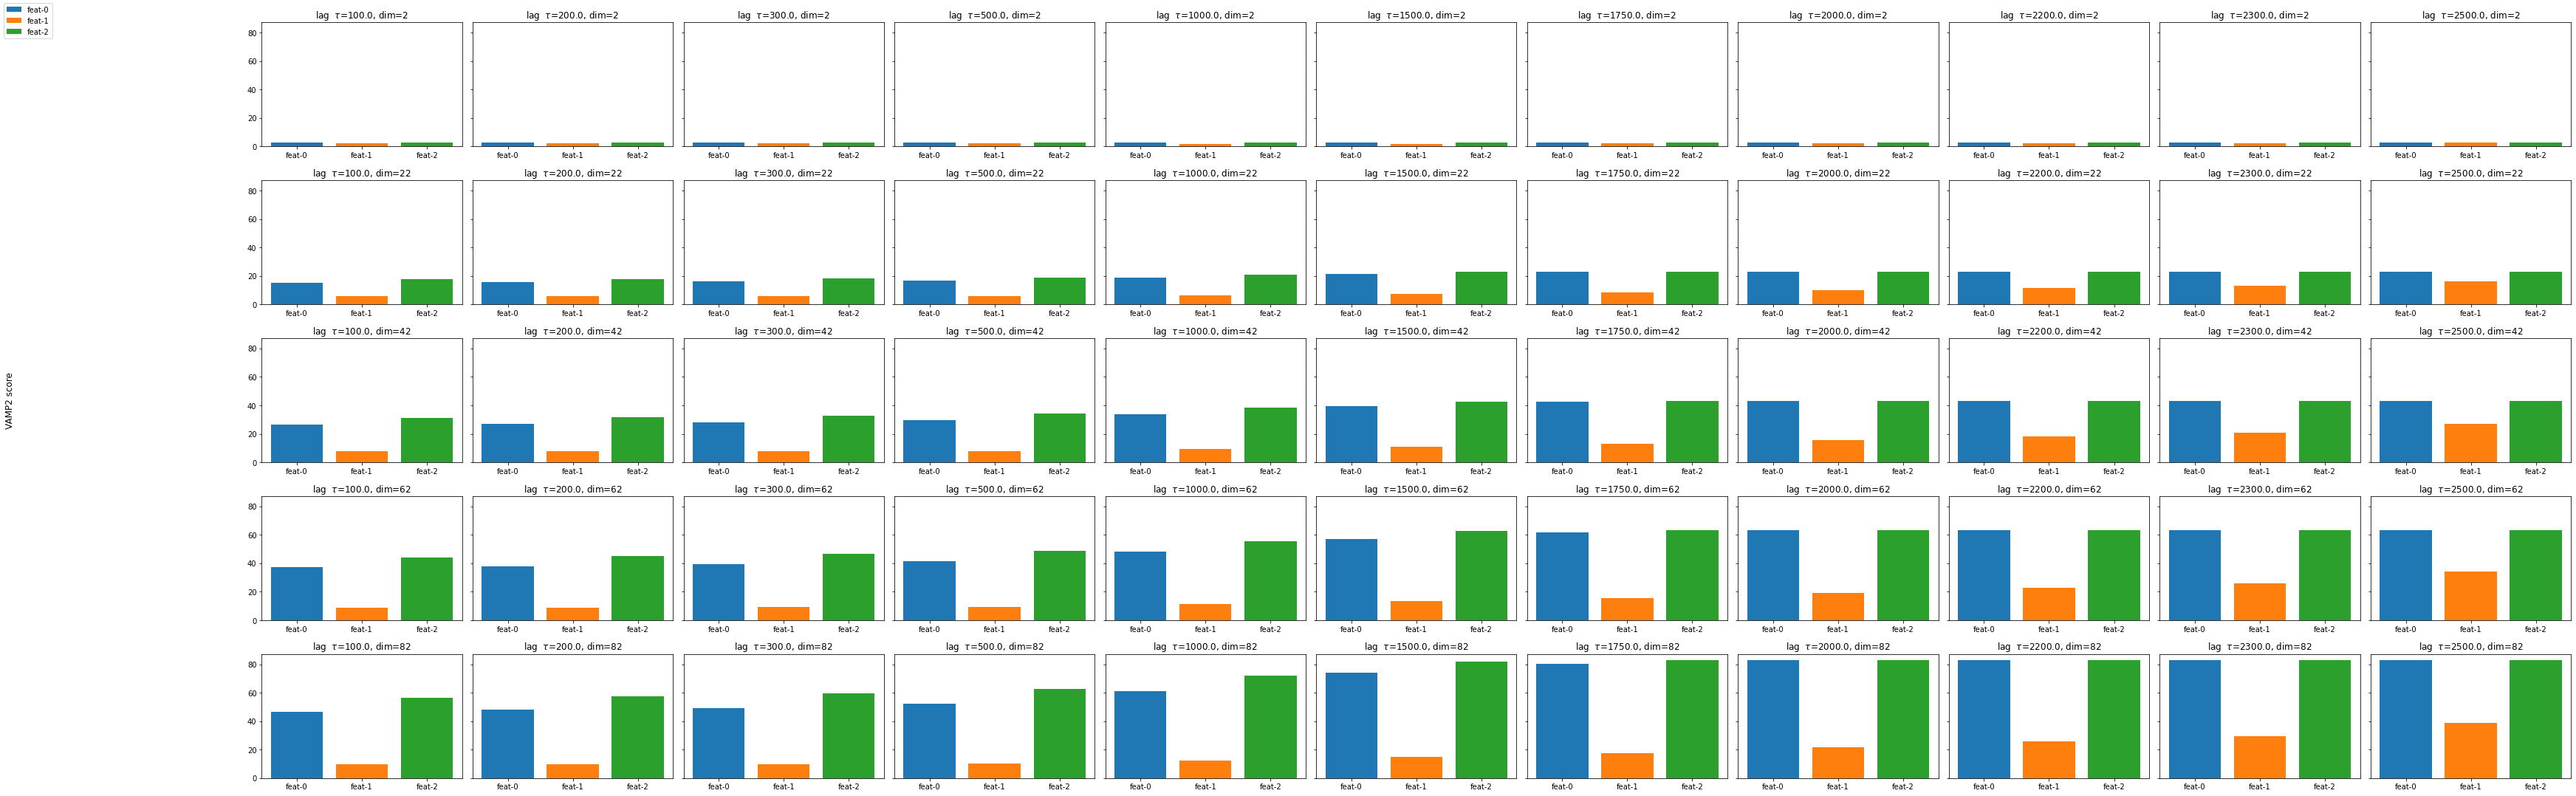

In [8]:
# choose the ensemble generator instance
engen = engen3

#initialize some features - default of custom
engen.init_featurizers_default()

#provide a range of lags and dimensions to train on
lags = [100, 200, 300, 500, 1000, 1500]
dims = [i + 1 for i in range(1,100, 20)]

#initialize VAMP2 featurizer and run it
featsel = fs.VAMP2FeatureSelection(lags, dims, engen)
featsel.run_vamp()

#plot VAMP2 results
featsel.plot_results()

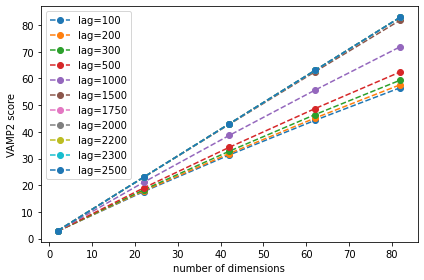

In [9]:
#plot how number of dimensions increases VAMP2 score for different lag times for a specific featurization

feat_index = 2
featsel.plot_dimensions(feat_index)

### Step 4 - pick the featurization

We suggest using the featurization which gives you the highest VAMP2 score from the analysis above.
However, you are free to choose the featurization using your own reasoning.

In [10]:
# Option 1 - select using the VAMP2 selector from above 

featsel.select_feature()

Choosing features with VAMP might take some time...
Using recycled VAMP2 scores.
Picked featurized no. 2
With maximum VAMP2 score no. 2
['COS(PHI 0 ALA 57)', 'SIN(PHI 0 ALA 57)', 'COS(PSI 0 TYR 7)', 'SIN(PSI 0 TYR 7)', 'COS(PHI 0 ALA 61)', 'SIN(PHI 0 ALA 61)', 'COS(PSI 0 ALA 57)', 'SIN(PSI 0 ALA 57)', 'COS(PHI 0 ILE 64)', 'SIN(PHI 0 ILE 64)', 'COS(PSI 0 ALA 61)', 'SIN(PSI 0 ALA 61)', 'COS(PHI 0 SER 65)', 'SIN(PHI 0 SER 65)', 'COS(PSI 0 ILE 64)', 'SIN(PSI 0 ILE 64)', 'COS(PHI 0 ALA 79)', 'SIN(PHI 0 ALA 79)', 'COS(PSI 0 SER 65)', 'SIN(PSI 0 SER 65)', 'COS(PHI 0 VAL 82)', 'SIN(PHI 0 VAL 82)', 'COS(PSI 0 ALA 79)', 'SIN(PSI 0 ALA 79)', 'COS(PHI 0 LEU 83)', 'SIN(PHI 0 LEU 83)', 'COS(PSI 0 VAL 82)', 'SIN(PSI 0 VAL 82)', 'COS(PHI 0 THR 86)', 'SIN(PHI 0 THR 86)', 'COS(PSI 0 LEU 83)', 'SIN(PSI 0 LEU 83)', 'COS(PHI 0 GLN 87)', 'SIN(PHI 0 GLN 87)', 'COS(PSI 0 THR 86)', 'SIN(PSI 0 THR 86)', 'COS(PHI 0 ILE 90)', 'SIN(PHI 0 ILE 90)', 'COS(PSI 0 GLN 87)', 'SIN(PSI 0 GLN 87)', 'COS(PHI 0 ALA 95)', 'SIN

In [11]:
# Option 2 - select using your own analysis, just set the number of the feature from the list
feat_num = 1

# initialize selector
featsel = fs.UserFeatureSelection(feat_num, engen)
#select the feature
featsel.select_feature()

Picked featurized no. 1
['COS(PHI 0 ALA 57)', 'SIN(PHI 0 ALA 57)', 'COS(PSI 0 TYR 7)', 'SIN(PSI 0 TYR 7)', 'COS(PHI 0 ALA 61)', 'SIN(PHI 0 ALA 61)', 'COS(PSI 0 ALA 57)', 'SIN(PSI 0 ALA 57)', 'COS(PHI 0 ILE 64)', 'SIN(PHI 0 ILE 64)', 'COS(PSI 0 ALA 61)', 'SIN(PSI 0 ALA 61)', 'COS(PHI 0 SER 65)', 'SIN(PHI 0 SER 65)', 'COS(PSI 0 ILE 64)', 'SIN(PSI 0 ILE 64)', 'COS(PHI 0 ALA 79)', 'SIN(PHI 0 ALA 79)', 'COS(PSI 0 SER 65)', 'SIN(PSI 0 SER 65)', 'COS(PHI 0 VAL 82)', 'SIN(PHI 0 VAL 82)', 'COS(PSI 0 ALA 79)', 'SIN(PSI 0 ALA 79)', 'COS(PHI 0 LEU 83)', 'SIN(PHI 0 LEU 83)', 'COS(PSI 0 VAL 82)', 'SIN(PSI 0 VAL 82)', 'COS(PHI 0 THR 86)', 'SIN(PHI 0 THR 86)', 'COS(PSI 0 LEU 83)', 'SIN(PSI 0 LEU 83)', 'COS(PHI 0 GLN 87)', 'SIN(PHI 0 GLN 87)', 'COS(PSI 0 THR 86)', 'SIN(PSI 0 THR 86)', 'COS(PHI 0 ILE 90)', 'SIN(PHI 0 ILE 90)', 'COS(PSI 0 GLN 87)', 'SIN(PSI 0 GLN 87)', 'COS(PHI 0 ALA 95)', 'SIN(PHI 0 ALA 95)', 'COS(PSI 0 ILE 90)', 'SIN(PSI 0 ILE 90)', 'COS(PHI 0 LYS 151)', 'SIN(PHI 0 LYS 151)', 'COS(PSI 

### Step 5 - save the results as input for Workflow2 - dimensionality reduction

In [12]:
with open("wf1_resulting_EnGen.pickle", "wb") as file:
    pickle.dump(engen, file, -1)